In [1]:
import warnings                                   # 경고 메시지를 출력하지 않게 하기위해
warnings.filterwarnings('ignore')               
%config Computer.use_jedi = False                 # 자동 완성 안될경우
import numpy as np                                # 수치 계산, 배열 처리
import pandas as pd                               # 데이터 분석을 위한 전처리.
import matplotlib as mpl                          
import matplotlib.pyplot as plt                   # 시각화.
mpl.rcParams['axes.unicode_minus'] = False        # matplotlib에서 '-' 깨지는 것 방지.
plt.rcParams['font.family'] = 'NanumGothicCoding' # matplotlib 글꼴.
plt.rcParams['font.size'] = 15                    # matplotlib 글꼴 크기.
import seaborn as sns                             # matplotlib 기반으로 만든 시각화 도구
from plotnine import *                            # R의 ggplot2 사용하는 것처럼 시각화.
import missingno as msno                          # 누락값의 분포를 그래프 형태로 보기.
import folium                                     # 지도 시각화.
# 쥬피터 노트북에서 그래프를 출력할 수 있게 한다.
# %matplotlib inline
# 쥬피터 노트북에서 그래프를 출력하고 변형을 할 수 있게 한다.
# %matplotlib notebook

Duplicate key in file WindowsPath('c:/python/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 255 ('font.size:    10.0')


서울시 4급 부서장 이상의 간부직 공무원의 업무 추진비 내역을 활용하여 업무 추진비 사용 목적과 업무 추진비를 사용한 장소를 분석한다.

https://opengov.seoul.go.kr/expense/list

In [22]:
df = pd.read_csv('./data/raw.csv')
print(df.shape)
df

(51456, 10)


,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [23]:
# 컬럼 이름 부여.
df.columns.name = '연번'
df

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


In [21]:
# index_col : 지정한 열을 인덱스로 끌어온다.
df = pd.read_csv('./data/raw.csv', index_col='일련번호') 
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
일련번호,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)


In [24]:
df.columns

Index(['1소속부서', '결제방법', '구분', '대상인원', '부서명', '일련번호', '집행금액', '집행목적', '집행일시',
       '집행장소'],
      dtype='object', name='연번')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51456 entries, 0 to 51455
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1소속부서   51456 non-null  object 
 1   결제방법    51279 non-null  object 
 2   구분      1479 non-null   object 
 3   대상인원    51448 non-null  object 
 4   부서명     51454 non-null  object 
 5   일련번호    51456 non-null  object 
 6   집행금액    51455 non-null  float64
 7   집행목적    51440 non-null  object 
 8   집행일시    51455 non-null  object 
 9   집행장소    51421 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.9+ MB


<AxesSubplot:>

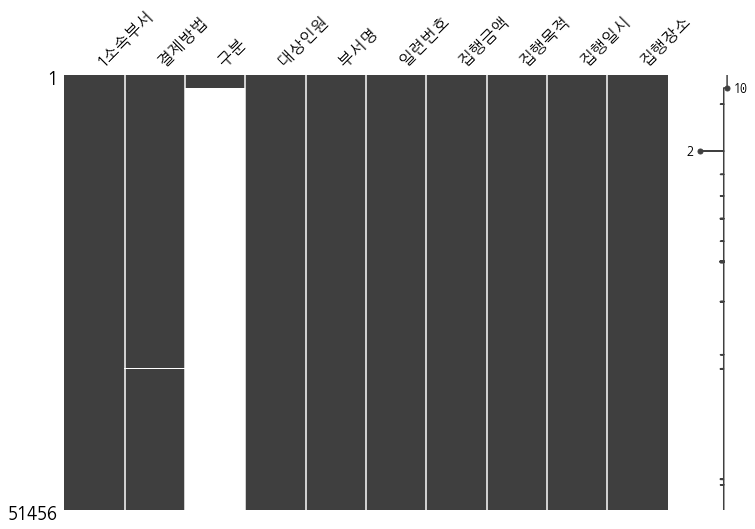

In [26]:
# missingno 패키지로 결측치를 시각화해 본다.
msno.matrix(df, figsize=(12, 8))

In [28]:
df.isnull().sum()

연번
1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
일련번호         0
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [41]:
# 집행일시에 누락값 데이터를 확인 후 제거
df[df.집행일시.isnull()]

연번
1소속부서                                              서울혁신기획관
결제방법                                                   NaN
구분                                                     NaN
대상인원                                                   NaN
부서명                                                    NaN
일련번호     해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비...
집행금액                                                   NaN
집행목적                                                   NaN
집행일시                                                   NaN
집행장소                                                   NaN
Name: 8958, dtype: object

In [49]:
# 제거
# 지정 조건을 기반으로 행을 삭제하기 위해서는, 
# 특정 조건을 전달하는 행의 인덱스를 선택하고 그 인덱스를 drop() 메소드로 넘깁니다.
df.drop(df[df.집행일시.isnull()].index, axis=0, inplace=True)
# inplace=True - 새로운 dataframe 객체를 생성하는 대신, 동일한 dataframe에서 제거 연산을 실행합니다.

In [47]:
df.shape

(51455, 10)

In [50]:
df

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)


집행일시 열을 이용해서 '연', '월', '일', '연월', '시', '분', '요일' 파생 변수를 만든다.

In [51]:
# 판다스의 to_datetime() : object(문자열) 데이터를 datetime 데이터로 변환
df['집행일시'] = pd.to_datetime(df['집행일시'])
df.dtypes

연번
1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
일련번호             object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
dtype: object

In [56]:
print(type(df.집행일시))
# 시리즈에 .str붙이면 문자열함수 쓸수잇는것처럼 .dt붙이면 날짜함수 ㄱㄴ
print(type(df.집행일시.dt))
print(df.집행일시.dt.year)
print(df.집행일시.dt.year.astype(int))

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.accessors.DatetimeProperties'>
0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
51451    2016
51452    2016
51453    2016
51454    2016
51455    2016
Name: 집행일시, Length: 51455, dtype: int64
0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
51451    2016
51452    2016
51453    2016
51454    2016
51455    2016
Name: 집행일시, Length: 51455, dtype: int32


In [62]:
df['연']=df.집행일시.dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['일'] = df['집행일시'].dt.day.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str) # 중간에 - 를 붙이기 위해 문자로 변환
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
# 0 => 월, 1 => 화, ... , 6 => 일
df['요일'] = df['집행일시'].dt.dayofweek.astype(int)
df

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일
0,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,1,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41:00,동신참치양재직(서초구 강남대로 213),2018,1,19,2018-1,20,41,4
1,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,2,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06:00,서울시청구내식당 ( 중구 세종대로 110),2018,1,23,2018-1,19,6,1
2,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,3,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13:00,한뫼촌(종로구 북촌로),2018,1,29,2018-1,20,13,0
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,4,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09:00,서울시청구내식당(중구 세종대로 110),2018,1,12,2018-1,9,9,4
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,5,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10:00,서울시청구내식당(중구 세종대로 110),2018,1,12,2018-1,9,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51451,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,39,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23:00,올리브네트웍스 (중구 세종대로 16길),2016,12,29,2016-12,13,23,3
51452,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,40,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19:00,남도한식고운님 (중구 세종대로 82),2016,12,29,2016-12,21,19,3
51453,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,41,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04:00,춘산에프앤비 (중구 태평로1가 84),2016,12,30,2016-12,13,4,4
51454,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,42,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13:00,스타벅스 (중구 을지로 19),2016,12,30,2016-12,13,13,4


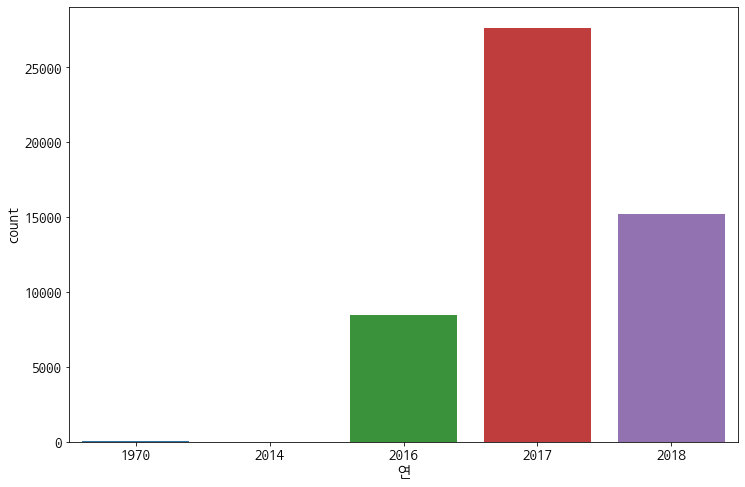

In [63]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='연')
plt.show()

In [64]:
df[df.연==1970]

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일
312,서울특별시장,카드,시정 관련 간담회 등,시장 등 3명,행정국 총무과,31,34000.0,시정 현장방문 관련 업무협의,1970-01-01 09:00:00,뼈큰감자탕 (대구 중구 명덕로),1970,1,1,1970-1,9,0,3
371,서울특별시장,카드,시정 관련 간담회 등,시장 등 4명,행정국 총무과,46,118000.0,시정 정책 추진 자문 간담회,1970-01-01 09:00:00,서울시청구내식당,1970,1,1,1970-1,9,0,3
398,서울특별시장,카드,현업-우수부서 격려 등,직원 26명,행정국 총무과,27,130000.0,한양조성 도감 추진 노고 직원 격려,1970-01-01 09:00:00,빚은 (중구 세종대로길),1970,1,1,1970-1,9,0,3
408,서울특별시장,카드,시정 관련 간담회 등,시장 등 7명,행정국 총무과,37,151400.0,시정 일정 및 현장방문 관련 업무협의,1970-01-01 09:00:00,본도시락 (중구 소공로길),1970,1,1,1970-1,9,0,3
409,서울특별시장,현금,현업-우수부서 격려 등,직원 1명,행정국 총무과,38,1000000.0,사망직원 유족 위로금 지급,1970-01-01 09:00:00,-,1970,1,1,1970-1,9,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41017,행정국,카드,NaN,전직원,일력개발과,32,66000.0,2016 인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청매점 (중구 서소문동),1970,1,1,1970-1,9,0,3
41018,행정국,카드,NaN,전직원,일력개발과,33,66000.0,인력개발과 종무식 다과비 지급,1970-01-01 09:00:00,서울시청신매점 (중구 세종대로),1970,1,1,1970-1,9,0,3
42515,행정국,카드,NaN,의전팀장 등 3명,행정국 총무과,28,39000.0,대한노인회 서울시연합회 정기총회 의전지원 업무협의,1970-01-01 09:00:00,먹는세상 (용산구 효창원로),1970,1,1,1970-1,9,0,3
42774,행정국,카드,NaN,행정국장 등 4명,행정국 총무과,137,29000.0,시민카드 운영 관련 업무협의,1970-01-01 09:00:00,별미삼청수제비 (종로구 삼청로길),1970,1,1,1970-1,9,0,3


In [65]:
df[df.연==2014]

연번,1소속부서,결제방법,구분,대상인원,부서명,일련번호,집행금액,집행목적,집행일시,집행장소,연,월,일,연월,시,분,요일
16772,비상기획관,카드,NaN,"민방위담당관, 주ㅇㅇ주무관등 16명",민방위담당관,26,64000.0,제407차 민방위의 날 전국 지진대피훈련 관련 간담회,2014-04-23 10:41:00,서울시청구내식당(중구 세종대로),2014,4,23,2014-4,10,41,2


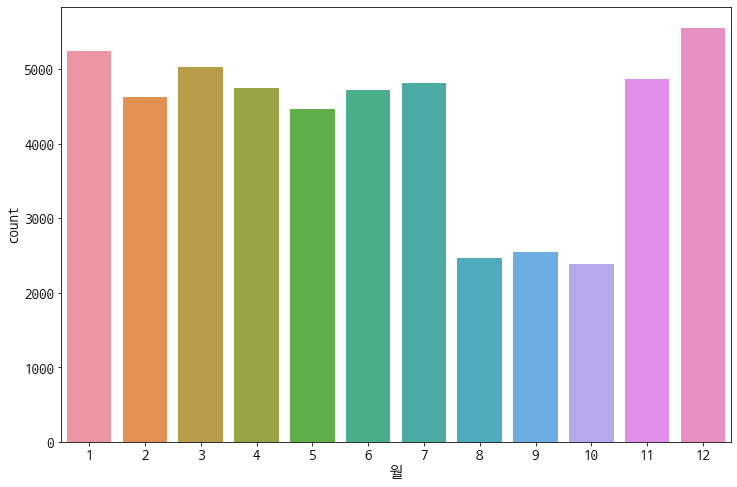

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='월')
plt.show()

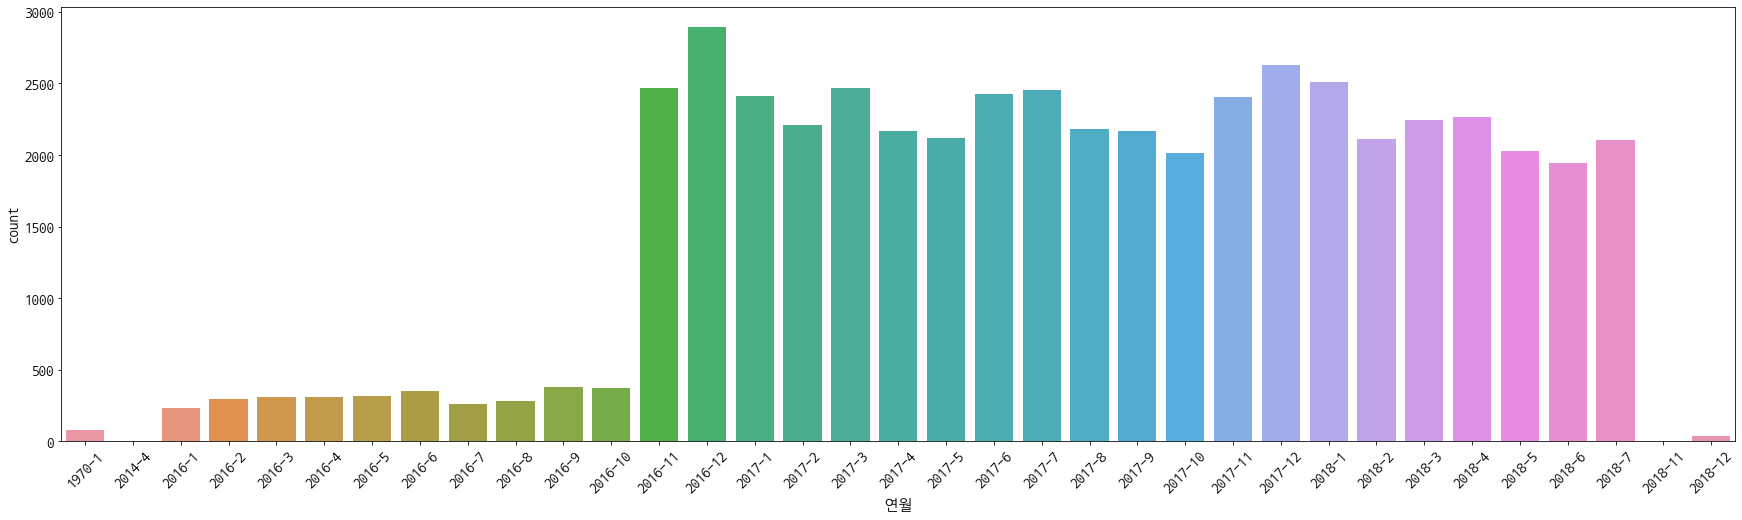

In [73]:
plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.countplot(data=df, x='연월')
plt.show()


In [74]:
# 연, 월의 오름차순으로 정렬한다.
# sort_values() 함수의 by 옵션에 정렬의 기준으로 사용할 컬럼을 지정
# ascending 옵션의 기본값은 True
df.sort_values(by=['연', '월'], inplace=True) # inplace=True => 즉시적용